<h1>Stage 1 : PLAN</h1>


<h1>Understand the business scenario and problem</h1>
The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

<h3>Importing required packages</h3>

In [ ]:
# Import packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,recall_score,precision_score,accuracy_score,roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv("/content/HR_comma_sep.csv")

# Display first few rows of the dataframe
df0.head(10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


<h3>Step 2. Data Exploration (Initial EDA and data cleaning)</h3>
*   Understand your variables <br>
*   Clean your dataset (missing data, redundant data, outliers)


In [ ]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<h3>Rename columns</h3>
As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

In [ ]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
# Rename columns as needed
df0.rename(columns={"number_project":"number_of_projects","average_montly_hours":"average_monthly_hours","Work_accident":"work_accident","Department":"department","time_spend_company":"tenure"},inplace=True)

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

<h3>Check missing values</h3>


In [ ]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

<h3>Check duplicates</h3>

In [ ]:
#Check for any duplicate entries in the data.
df0.duplicated().sum()

3008

In [ ]:
# Inspect some rows containing duplicates as needed
dup_bm=df0.duplicated()
df0[dup_bm].head(10)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [ ]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df0=df0.drop_duplicates(keep="first")
df0.duplicated().sum()

# Display first few rows of new dataframe as needed
df0.head(10)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


<h3>Check outliers</h3>

Text(0.5, 1.0, 'Boxplot to detect outliers in tenure')

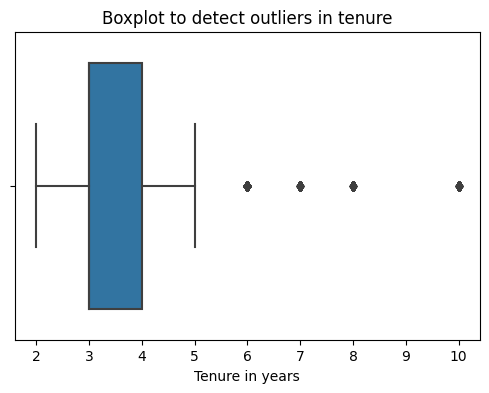

In [ ]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df0["tenure"])
plt.xlabel("Tenure in years")
plt.title("Boxplot to detect outliers in tenure")

In [ ]:
# Compute the 25th percentile value in `tenure`
percentile_25= df0["tenure"].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile_75= df0["tenure"].quantile(0.75)

#determining inter quartile range
iqr= percentile_75-percentile_25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_lim= percentile_75 + 1.5*iqr
lower_lim= percentile_25 - 1.5*iqr

# Determine the number of rows containing outliers
outliers=df0[(df0["tenure"]<lower_lim) | (df0["tenure"]>upper_lim)]
print(outliers.shape [0])

824


Tree based models are robust to outliers as there are very few outliers and we are using tree based models it is not necessary to remove outliers

<h2>pAce: Analyze Stage</h2>
<h3>Perform EDA (analyze relationships between variables)</h3>

<h3>Step 2. Data Exploration (Continue EDA)</h3>
Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [ ]:
# Get numbers of people who left vs. stayed
df0["left"].value_counts(normalize=True)
### YOUR CODE HERE ###


0    0.833959
1    0.166041
Name: left, dtype: float64

<h3>Data visualizations</h3>
Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Number of projects histogram')

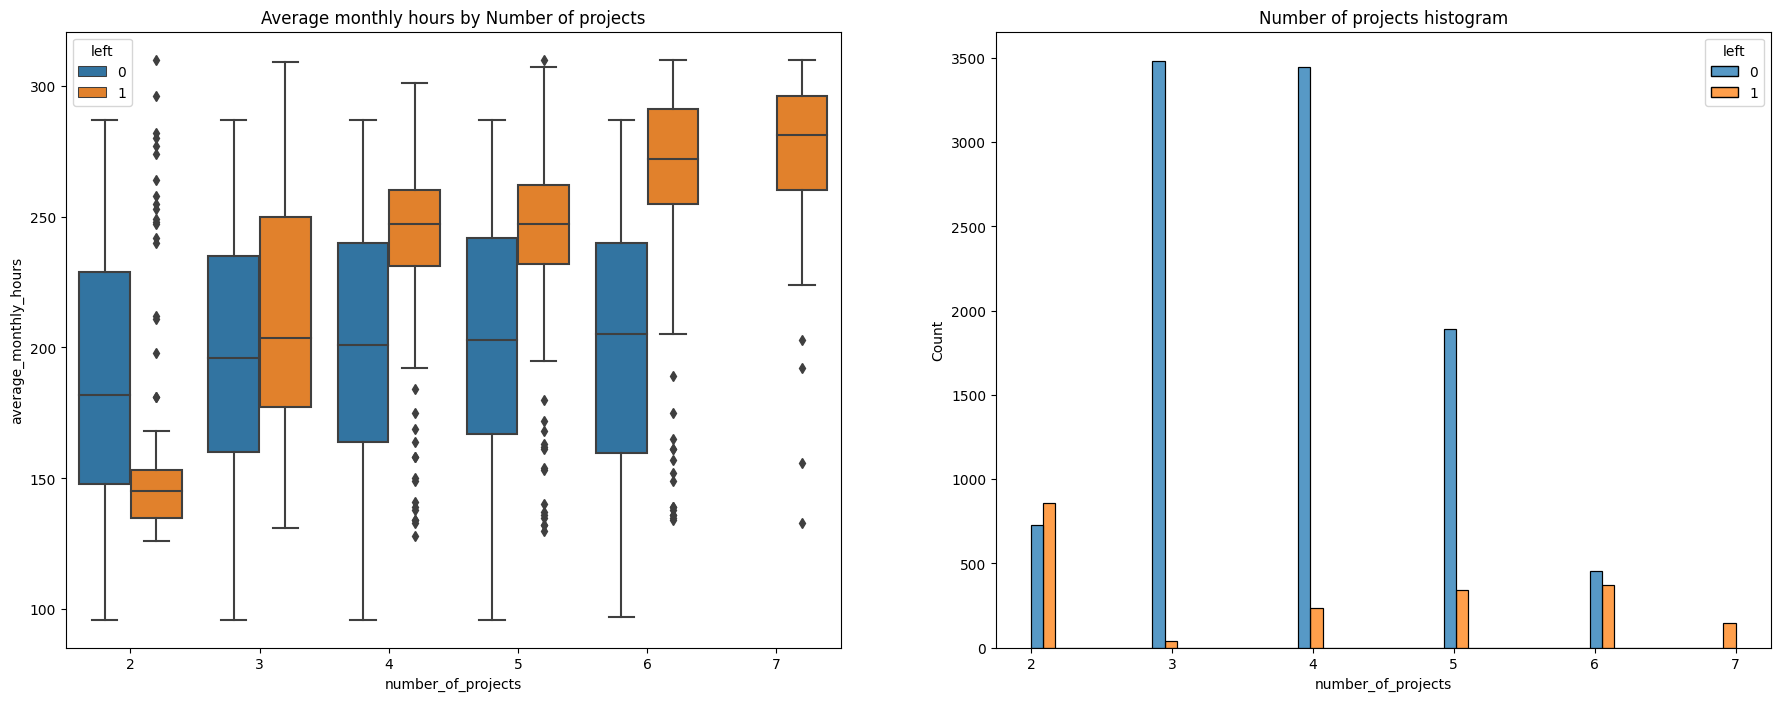

In [ ]:
#set figure size and axis
fig ,ax=plt.subplots(1,2, figsize=(22,8))

#create a boxplot showing the "average_monthly_hours" for "number_of_projects" to compare mean "average_monthly_hours" between employees who left and stayed
sns.boxplot(x=df0["number_of_projects"],y=df0["average_monthly_hours"],hue=df0["left"],ax=ax[0])
ax[0].set_title("Average monthly hours by Number of projects")

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df0,x="number_of_projects",hue="left",multiple='dodge',ax=ax[1])
ax[1].set_title("Number of projects histogram")




1.   By observing the above boxplot , we can see that the mean "average_monthly_hours" of the employees who left is more than that of the employees who stayed. so one of the reasons for the employees leaving can be that they were overworked.

2.   Assuming an employee works 40 hours/week , 4 weeks a month he would have to work for ~160 hours/week.

3.  we can notice that amost every employee who worked on 7 project left and they worked for (~280 hours/month), which ~120 hours more than what a normal employee works.employees who did not leave and had 6 projects  worked for ~210 hours/ month which is a lot more than that of a normal employee










Check if every employee who had 7 projects left

In [ ]:
#check if any employee who worked on 7 projects stayed
df0[(df0["number_of_projects"]==7)&(df0["left"]==0)].shape

(0, 10)

This confirms that all the employees who worked on 7 project did leave.
Next we can examine the average_monthly_hours vs satisfaction levels using a scatter plot.

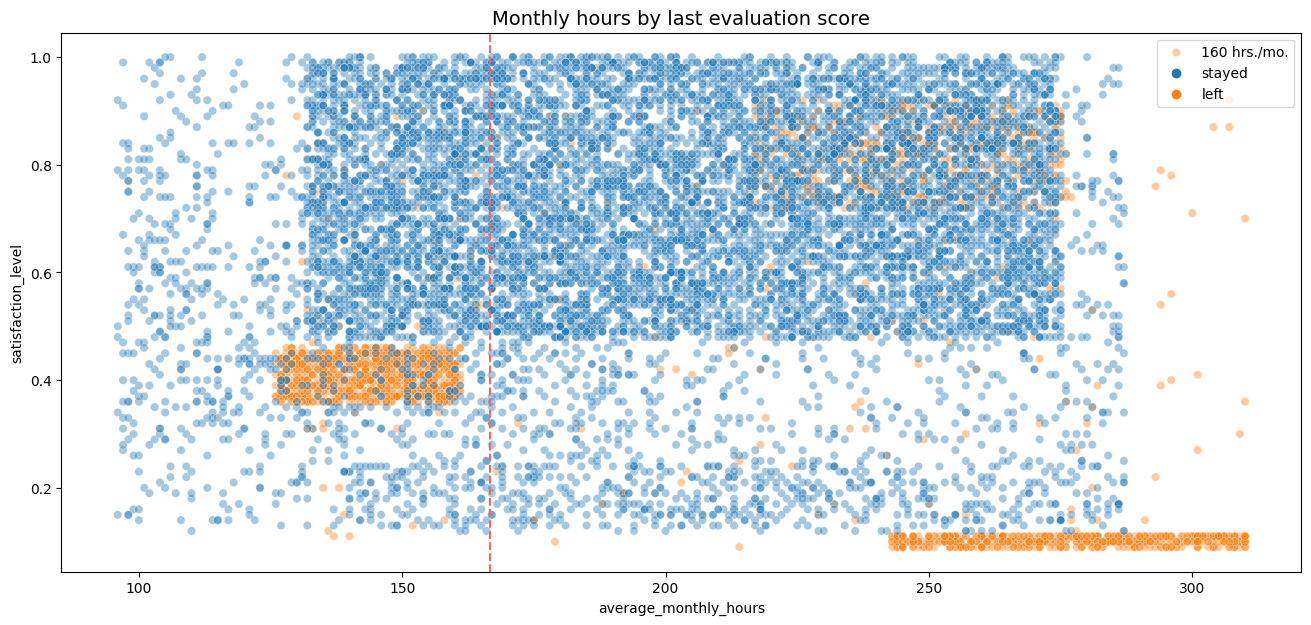

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df0, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='160 hrs./mo.', ls='--')
plt.legend(labels=['160 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

It can be seen that most of the people who worked for more that (~270 hours/month) had very low satisfaction levels and left the company.

Another group of people who left worked for (~130 hours/month to ~160 hours/month) and had ~0.4 satisfaction_level . It is not possiable to conclude the reason for them leaving. They might have felt pressurized to work more or were not statified with their work.

Group of employees who had ~0.8 satisfaction_level but worked for ~220 hours/month to ~260 hours/month also left . This might be because their working hours were more.


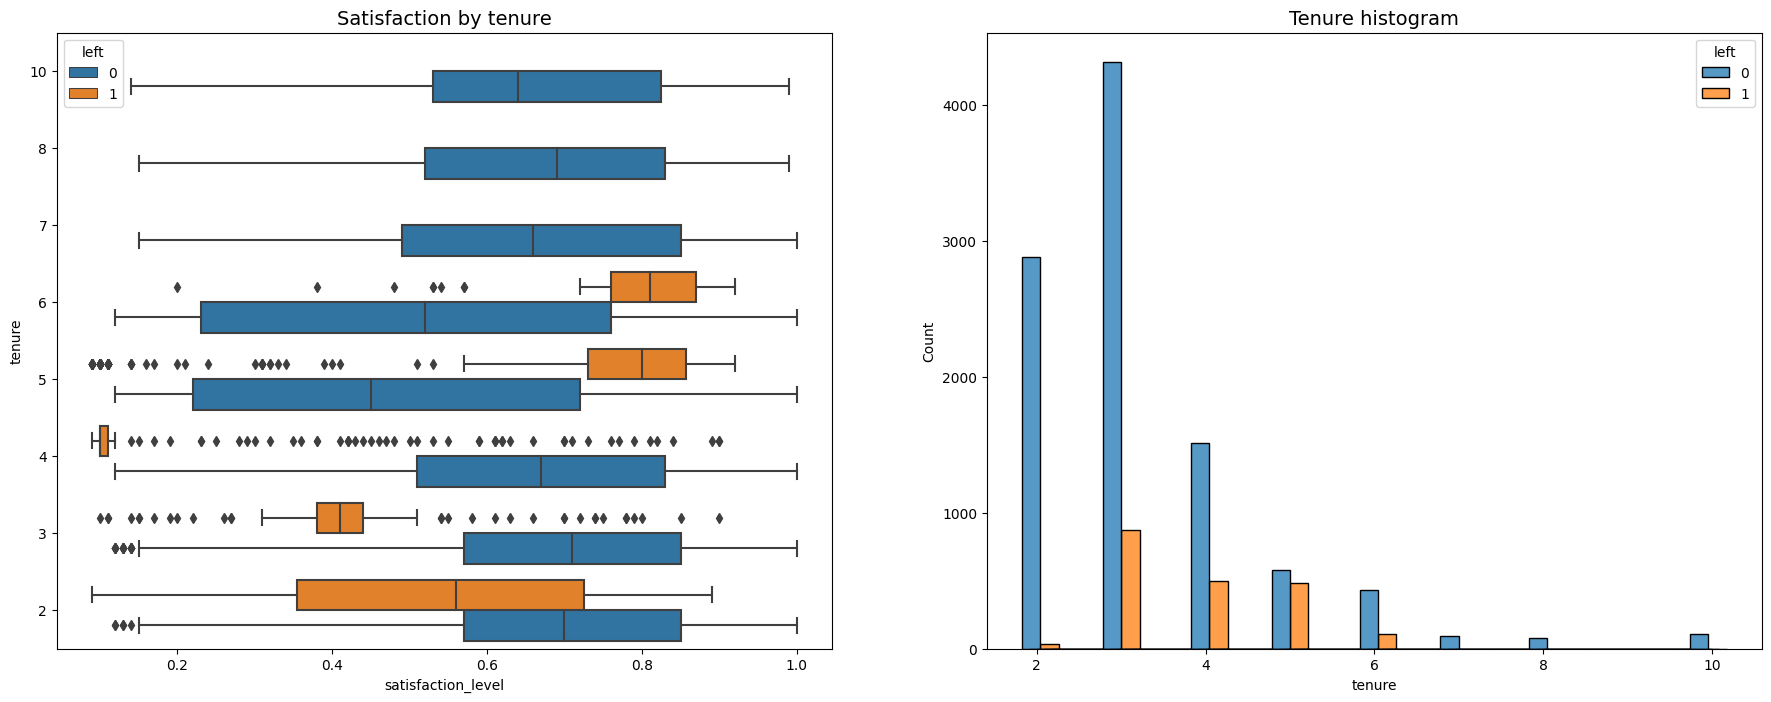

In [ ]:
# Create a plot as needed

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df0, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df0[df0['left']==0]['tenure']
tenure_left = df0[df0['left']==1]['tenure']
sns.histplot(data=df0, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();



* Employees with low tenure and low satisfaction levels left the company.
*  Employees who worked for 4 years and left had very low statisfaction levels ,this might be worth looking into.
* Employees who workedfor 7-10 year had the same satifaction levels as of the employees who newly joined the company and did not leave. It is seen that the employees with high tenure did not leave the company.






In [ ]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df0.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


Next we could examine the salary levels of the employees with different tenures

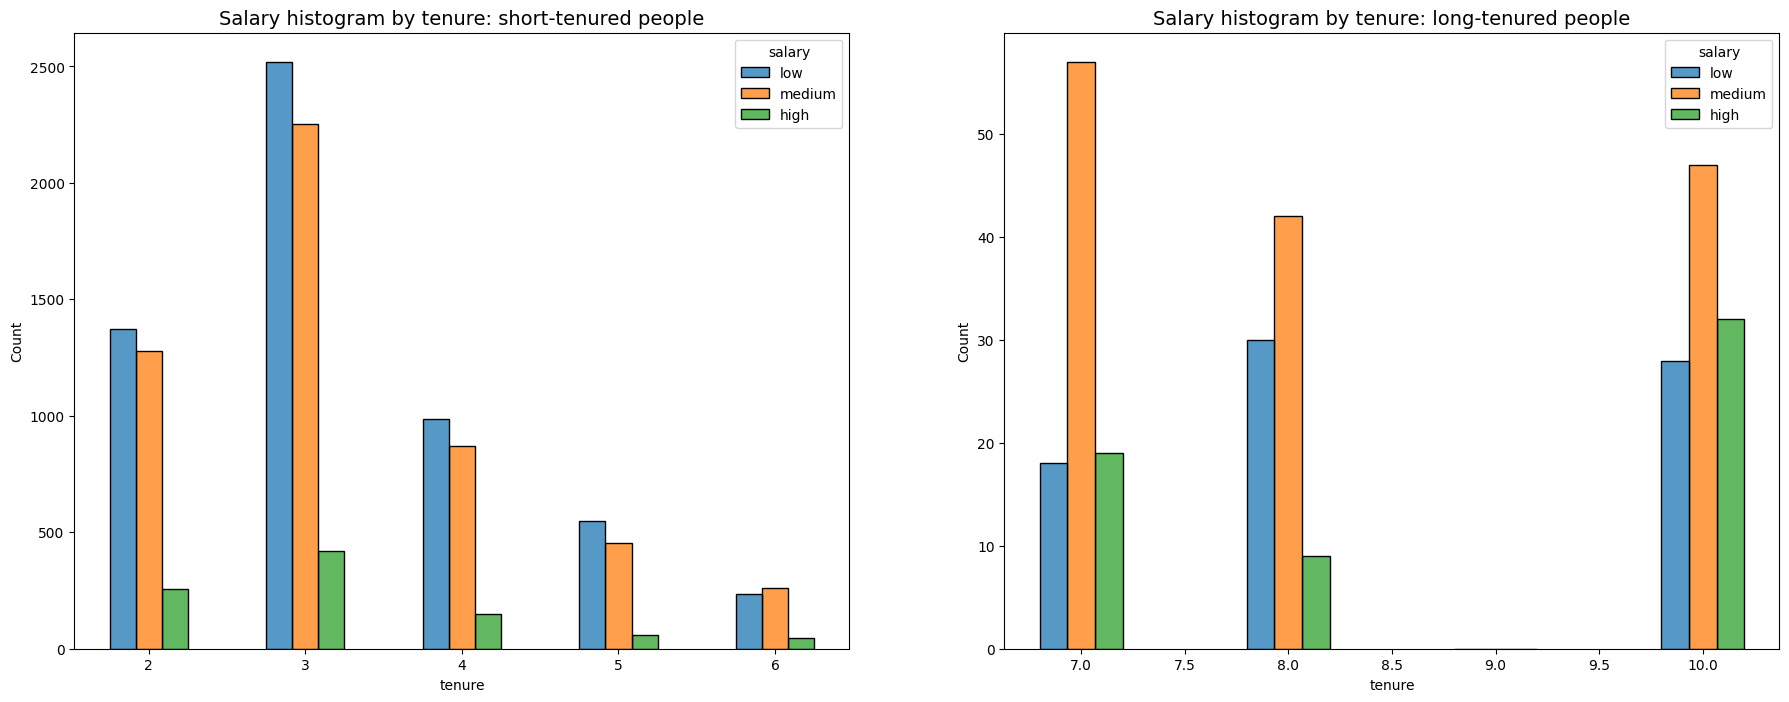

In [ ]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df0[df0['tenure'] < 7]

# Define long-tenured employees
tenure_long = df0[df0['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1,
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The long_tenure graph does not have too many highly payed employees

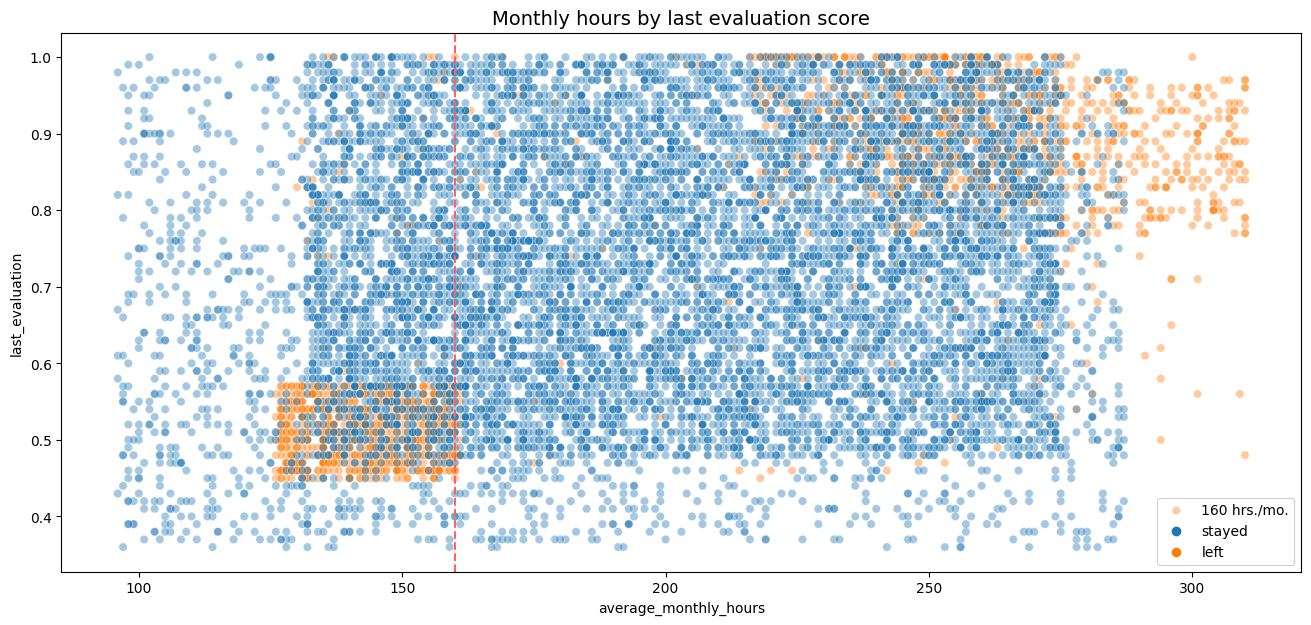

In [ ]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 7))
sns.scatterplot(data=df0, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=160, color='#ff6361', label='160 hrs./mo.', ls='--')
plt.legend(labels=['160 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

We can notice two groups of employees who left:
1.   Group 1: employees who had low last_evaluation score and worked for ~130 hours/month to ~160 hours/month
2.    Group 2: employees who had high last_evaluation score but worked for ~220 hours/month to ~300 hours/month

Group 1 employees might have been let go by the company itself beacause of comparitively low performance.
Group 2 employees were high contributers to the company but might have left because  they were working for more that normal hours




Now we can examine promition_in_last_5years based on average_monthly_hours





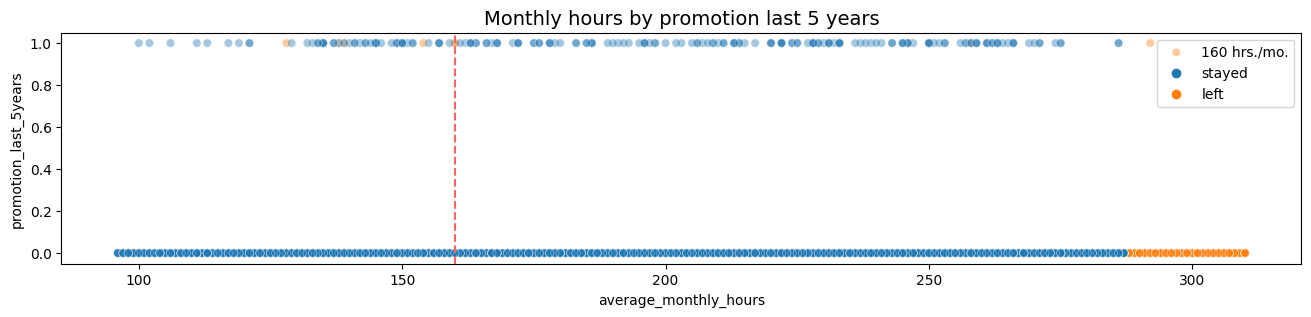

In [ ]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df0, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=160, color='#ff6361', ls='--')
plt.legend(labels=['160 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

We can notice a group of people who worked for more than ~260 hours/month but left the company. We can conclude that they did so because they did not recive any promotions for last 5 years.
This can be avoided by rewarding high performing workers for there overtime.

Now we can check the disturbution of employees who left and stayed accross diffrent departments

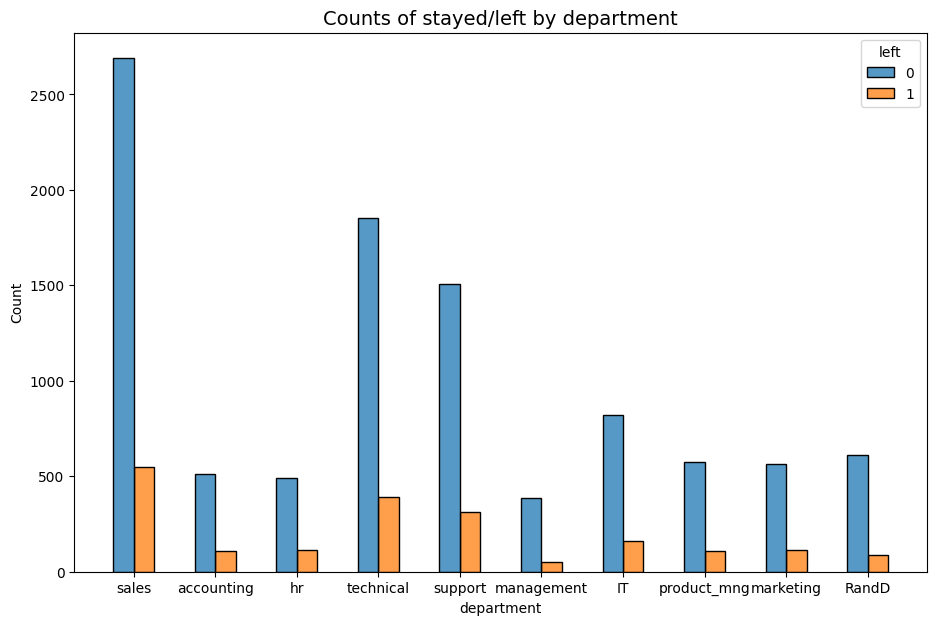

In [ ]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(11,7))
sns.histplot(data=df0, x='department', hue='left', discrete=1,
             hue_order=[0, 1], multiple='dodge', shrink=.5)
plt.title('Counts of stayed/left by department', fontsize=14);

There is no significant difference in proportions of people who left and stayed across different departments

Now, we can check for correations between variables in the data

<ipython-input-26-6e2a250dbe1b>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True,cmap=sns.color_palette("crest", as_cmap=True))


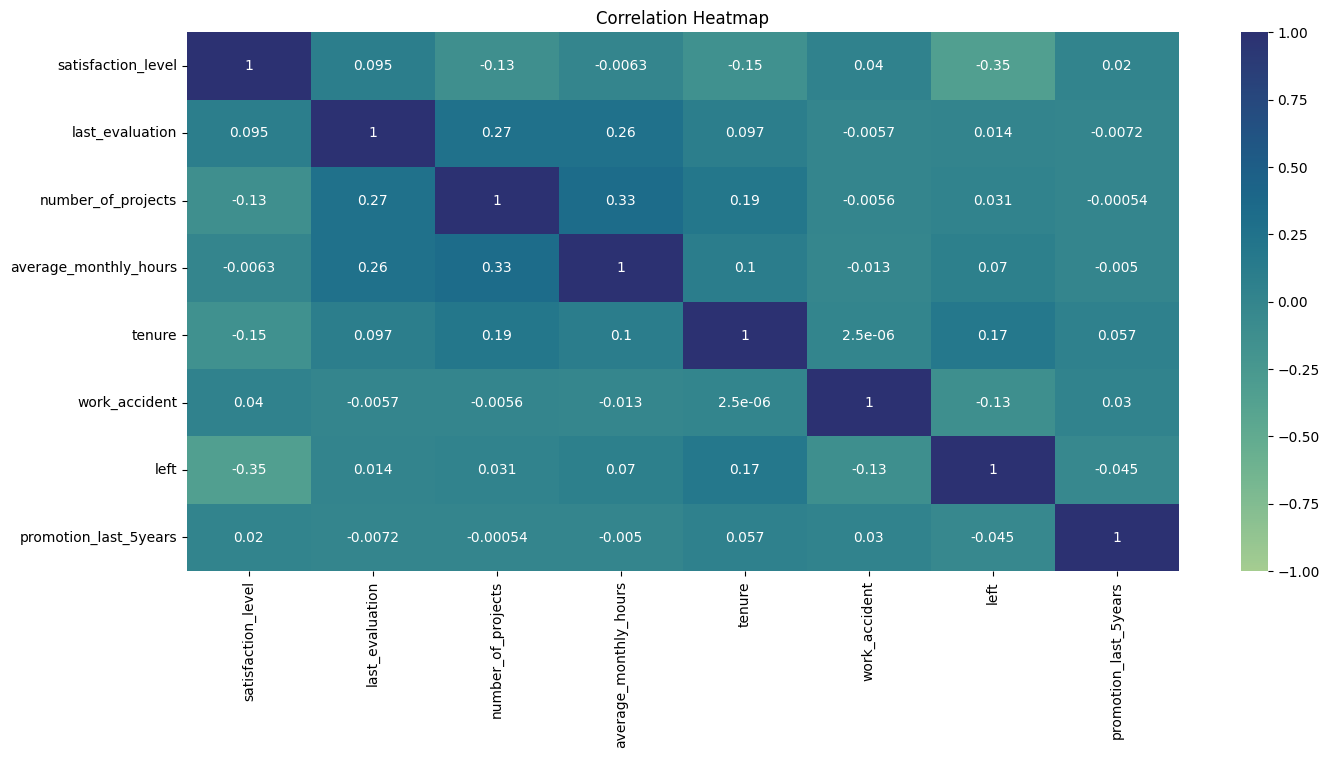

In [ ]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 7))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True,cmap=sns.color_palette("crest", as_cmap=True))
heatmap.set_title('Correlation Heatmap');

It can be seen that number_of_projects ,average_monthly_hours, tenure ,last_evaluation are positively correalted to left

<h2>Insights</h2>
It can be seen that employees are leaving the company mostly because of high working hours and high number of projects.It is also seen the high performance workers do not recive promotions and hence leave the company.
workers who have worked in the company for more than 6 years do not  leave the
company

<h1>paCe Construct</h1>

<h3>Indentifying the nature of the outcome variable</h3>
The goal of the model is to predict if an employee leaves the company or not.
This can be achived by using <br>
1. logistic regression model<br>
2. Tree based clasification model <br>
We chose to use a Tree based classification model as it is robust against outilers.



<h2>Feature engineering</h2>
Creating a column which indicates if the employee is over worked (1) or not(0).A normal employee works for 8hours/day , 5 days/week , 4 weeks/year. The employee might work 15hours extra per month. Any employee working more than this acn be considered to be overworked

In [ ]:
#calculating number of hours a employee might work per month
normal_hours=4*5*8+15
normal_hours

175

In [ ]:
#create a column overworked
df0["overworked"]= [0 if x <= normal_hours else 1 for x in df0["average_monthly_hours"]]

In [ ]:
#count  number of employees in each category
df0["overworked"].value_counts()

1    7630
0    4361
Name: overworked, dtype: int64

<h2>Data encoding</h2>
Before fitting data to the model, columns containing non-numeric data is encoded using Label encoder

In [ ]:
#checking the datatypes of each column
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_of_projects     11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
 10  overworked             11991 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.1+ MB


In [ ]:
#maping data in salary column
df0["salary"]=df0["salary"].map({"high":2,"medium":1,"low":0})

In [ ]:
#creating a LabelEncoder object
encoder= LabelEncoder()
df0["department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [ ]:
#encoding department column
df0["department"]=encoder.fit_transform(df0["department"])

In [ ]:
#display the first 10 rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary,overworked
0,0.38,0.53,2,157,3,0,1,0,7,0,0
1,0.80,0.86,5,262,6,0,1,0,7,1,1
2,0.11,0.88,7,272,4,0,1,0,7,1,1
3,0.72,0.87,5,223,5,0,1,0,7,0,1
4,0.37,0.52,2,159,3,0,1,0,7,0,0
5,0.41,0.50,2,153,3,0,1,0,7,0,0
6,0.10,0.77,6,247,4,0,1,0,7,0,1
7,0.92,0.85,5,259,5,0,1,0,7,0,1
8,0.89,1.00,5,224,5,0,1,0,7,0,1
9,0.42,0.53,2,142,3,0,1,0,7,0,0


Spliting the dataset into training and testing data

In [ ]:
# assigning target variable and predictor variables
x=df0.drop(["left"],axis=1)
y=df0["left"]


In [ ]:
#splitting data into train and test sets , with 20% data in test set
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

<h3>Decision tree - Round </h3>
Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [ ]:
#Instantiate model
dtc= DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
tree_params={'max_depth':[4, 6, 8],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

#specify scoring metrics to capture
scoring={"f1","recall","precision","accuracy",'roc_auc'}

#Instantiate GridSearch
dtc_cv=GridSearchCV(dtc,tree_params,scoring=scoring,refit='roc_auc',cv=4)

fit the decision tree to training data

In [ ]:
%%time
dtc_cv.fit(x_train,y_train)

CPU times: user 3.6 s, sys: 9.33 ms, total: 3.61 s
Wall time: 3.68 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'roc_auc', 'recall', 'precision'})

identify the optimal values for the tree

In [ ]:
#display the best parameters
dtc_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
#display best roc_auc score
dtc_cv.best_score_

0.9710911037253271

As the model has a good auc score it can predict which employee will leave very well<br>
Define a function to get all the scores of the model

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

In [ ]:
make_results("Decision tree classifier",dtc_cv,"auc")

,model,precision,recall,F1,accuracy,auc
0,Decision tree classifier,0.926282,0.917764,0.921857,0.974145,0.971091


To avoid overfitting we can construct a random forest classifier next.

<h2>Random forest classifier</h2>

In [ ]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [100, 150],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

fit the model

In [ ]:
%%time
rf_cv.fit(x_train,y_train)

CPU times: user 4min 31s, sys: 586 ms, total: 4min 31s
Wall time: 4min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150]},
             refit='roc_auc',
             scoring={'f1', 'accuracy', 'roc_auc', 'recall', 'precision'})

In [ ]:
make_results("Random forest classifier",rf_cv,"auc")

,model,precision,recall,F1,accuracy,auc
0,Random forest classifier,0.948016,0.913998,0.930625,0.977377,0.979428


if we consider auc then the random forest classifier model is better than decision tree classifier.<br>
Tree based models are often sensitive to overfitting , so we have to score our random forest classifers on the test data.

Define a method to score the model on test data

In [ ]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

Scoring decison tree classifier on test data

In [ ]:
get_scores("decision tree classifier",dtc_cv,x_test,y_test)

,model,precision,recall,f1,accuracy,AUC
0,decision tree classifier,0.937984,0.91206,0.924841,0.975406,0.950033


scoring random forest classifier on test data

In [ ]:
get_scores("random forest classifier",rf_cv,x_test,y_test)

,model,precision,recall,f1,accuracy,AUC
0,random forest classifier,0.957784,0.91206,0.934363,0.978741,0.952032


we can see that random forest classifier has better precision and auc on test data. <br>
We continue to evaluate random forest classifier

Find out the best parameter set for random forest classifier

In [ ]:
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

Construct a confusion matrix

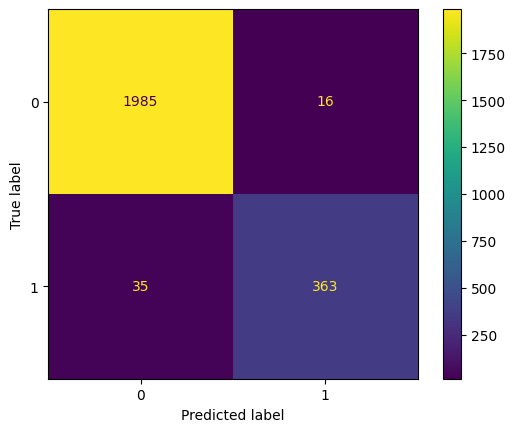

In [ ]:
# Generate array of values for confusion matrix
preds = rf_cv.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, preds, labels=rf_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_cv.classes_)

#eliminate the scientific notations
disp.plot(values_format='');

We can see that the model is good at classifing  the employees who are not going to leave and employees who are going to leave.<br>
The model might predict negligiable amount of false positives.
The model predicts some false negatives (employees who will leave but the model predicts otherwise) But yet the model is considered quite good as it is for less number of instances.

In [ ]:
#get the importances
importance= np.array(rf_cv.best_estimator_.feature_importances_)

#get the feature labels
features= np.array(x.columns)

#create a data frame
df_imp= pd.DataFrame({'feature_names':features,'feature_imp':importance} )

#sort the dataframe in descending order by importance
df_imp.sort_values(by="feature_imp",ascending=False,inplace=True)

Text(0.5, 1.0, 'feature importance by feature')

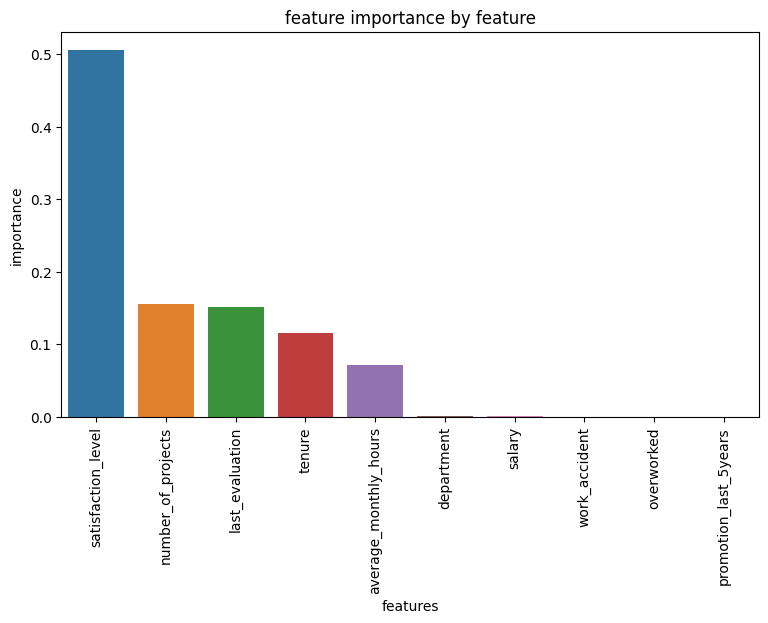

In [ ]:
#plot a bar plot of fetaure vs importance
plt.figure(figsize=(9,5))
sns.barplot(data=df_imp,x='feature_names',y='feature_imp')
plt.xticks(rotation=90)
plt.xlabel("features")
plt.ylabel("importance")
plt.title("feature importance by feature")

By the above bar plot we can see that "satisfaction_level" , "number_of_projects", "last_evaluation" , "tenure", "average_monthly_hours" have the heighest importance in the given order in predicting if the employee leaves the company or not.

<h2>pacE Execute </h2>

<h2>Summary of the model </h2>
The random forest classifier model has a precision of ~0.957 ,accuracy of ~0.978 ,auc of ~0.952,recall of ~0.912 and f1 of ~0.934 . The model performs well on the test data in predicting if the employee is going to leave or not.

<h2>Recomendations</h2>

*   Company should concentrate on holding meeting to ensure that the employees are not being overworked .
*   Company should try to reward employees who put in more effort with a promotion , this will help them stay motivated and continue to work with the company.
*   The company shouold ensure that an employee is not working on too many projects at the same time. This load should be divided  among multiple employees .
*  Hr team can hold meeting to help out the employees who feel presurized to work more and help solve their problems





